# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [97]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [98]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,10379,17972,4748,4686,1547,3265
2,37,1275,22272,137,6747,110


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
2     41.6  82.0     65.9    63.6              72.3          98.9
254   58.0  95.2     49.8    81.6              60.9          92.3
357    1.4  20.2     94.1     5.2              86.8           6.4


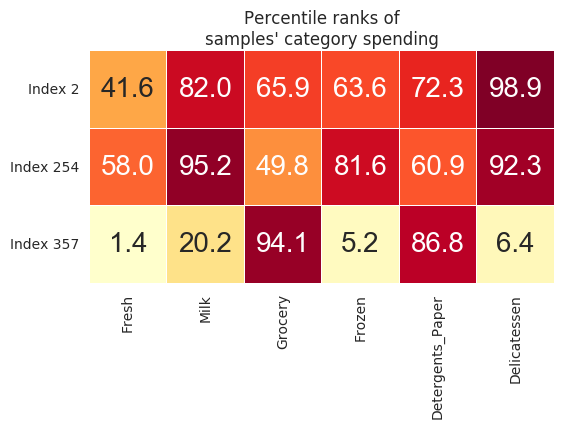

In [99]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [2,254,357]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# The following is the code suggested by the previous reviewer to further visualize the sample data points
# in terms of percentile ranks with heatmap. Very nice. Thanks!

import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, annot_kws={'size':20}, linewidth=.1, vmax=99, 
            fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.title('Percentile ranks of\nsamples\' category spending')

# End of heatmap code

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The first establishment (customer) has its purchase cost of Fresh items being 6353, between the 25% percentile and the median according to the statistical description of the dataset. Its purchase cost of Milk is 8808, above the 75% percentile. Its purchase cost of Grocery being 7684, is between the median and 75% percentile and slightly below the mean. Its purchase cost of Frozen being 2405 is between the median and 75% percentile. Its purchase cost of Detergents_Paper being 3516 is a near the 75% percentile and its purchase cost of Delicatessen is well above the 75% percentile. This customer could be a deli store that also sells some foods and groceries, given its large annual spending volume of Delicatessen and some volume of Fresh, Milk and other products.

The second establishment (customer) has its purchase cost of Fresh items being 10379, between the median and the 75% percentile of the data. Its purchase cost of Milk is well above the 75% percentile. Its purchase cost of Grocery being 4748 is slightly below the median. Its purchase cost of Frozen is above the 75% percentile. Its purchase cost of Detergents_Paper is between the median and 75% percentile but below the mean value. Its purchase cost of Delicatessen is above the 75% percentile. This could be a retail store focusing on selling large volumes of everyday food, given its large annual spending volume of Fresh/Milk.

The third establishment (customer) has its purchase cost of Fresh items being 37, much below the 25% percentile of the data and near the minimum. Its purchase cost of Milk is below the 25% percentile. Its purchase cost of Grocery being 22272 is above the 75% percentile. Its purchase cost of Frozen is well below the 25% percentile and close to the minimum. Its purchase cost of Detergents_Paper is above the 75% percentile. Its purchase cost of Delicatessen is below the 25% percentile. This could be an open market Grocery store, given its low purchase cost of Fresh/Frozen/Delicatessen goods but huge spending on Grocery items.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
from sklearn.cross_validation import train_test_split - Report the prediction score of the testing set using the regressor's `score` function.

In [100]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1, inplace = False)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.predict(X_test)

print r2_score(y_test, score)

0.602801978878


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict the annual spending (m.u.) on Grocery. The reported prediction score as measured by R^2 is 0.6028, indicating that the Grocery feature is correlated to a certain extent with the other features (in other words, the other features can somewhat predict the Grocery feature), but not very well. So the Grocery feature is still necessary for identifying customers' spending habits and it is relevant.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

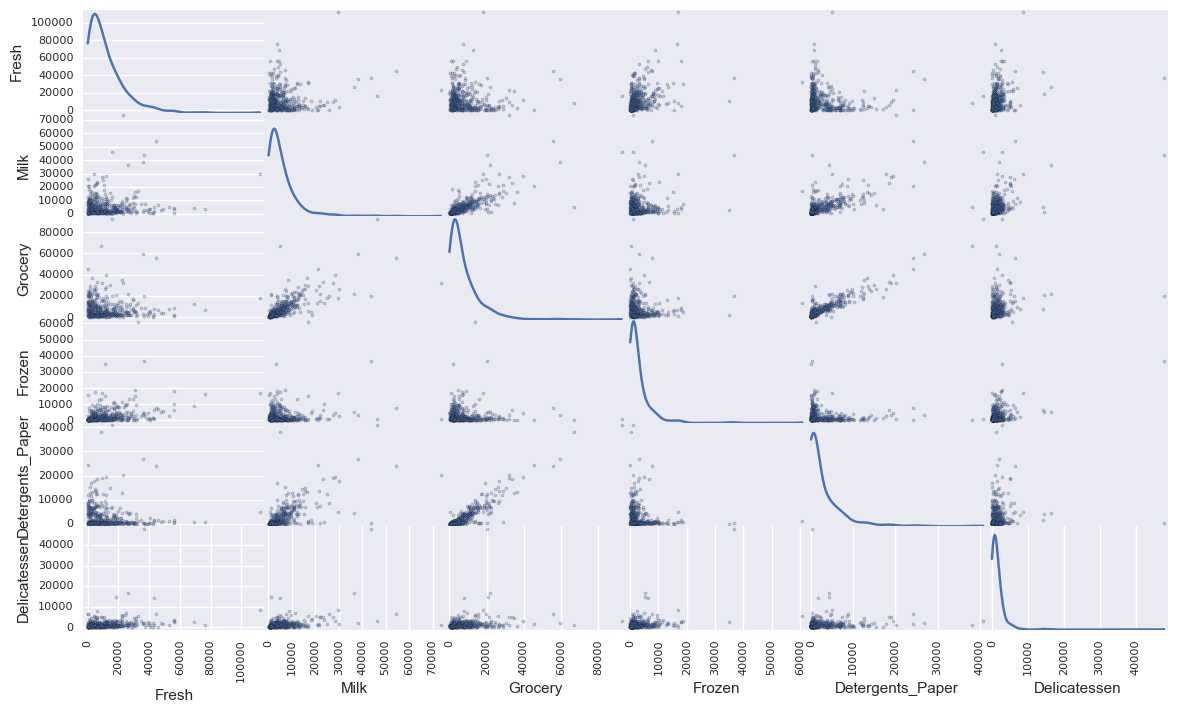

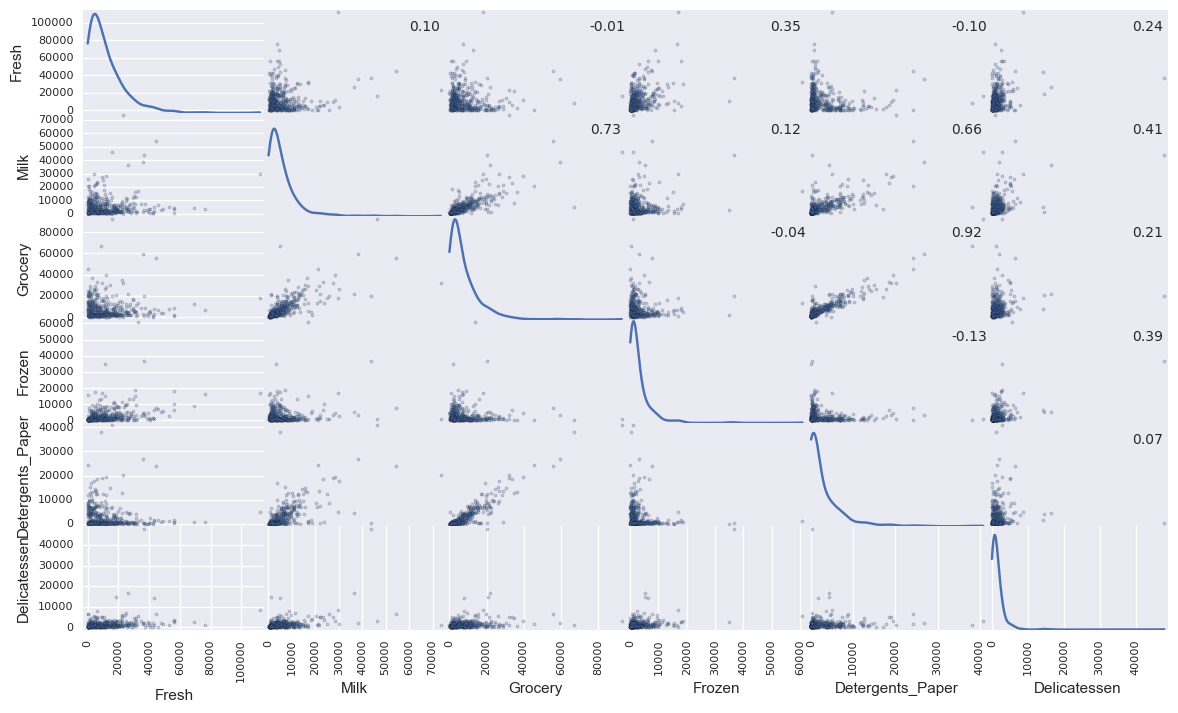

In [101]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# The following is the code suggested by the reviewer to more closely look at the scatter matrix with annotations

# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

# Reformat data.corr() for plotting
corr = data.corr().as_matrix()

# Plot scatter matrix with correlations
for i,j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.2f"%corr[i,j], (0.8,0.8), xycoords='axes fraction')

# End of reviewer's code

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The Grocery-Detergents_Paper pair shows some correlation based on the scatter matrix plot. This confirms that there is a certain extent of correlation of the Grocery feature that I attempted to predict and the correlation is strong between Grocery and Detergents_Paper. Similarly, there is some degree of correlation between Grocery and Milk, and between Detergents_Paper and Milk. The data for those features do not appear to be normally distributed. Most of the data points lie on the lower end of the X axis, showing a skewed distribution towards the lower end of the X axis.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

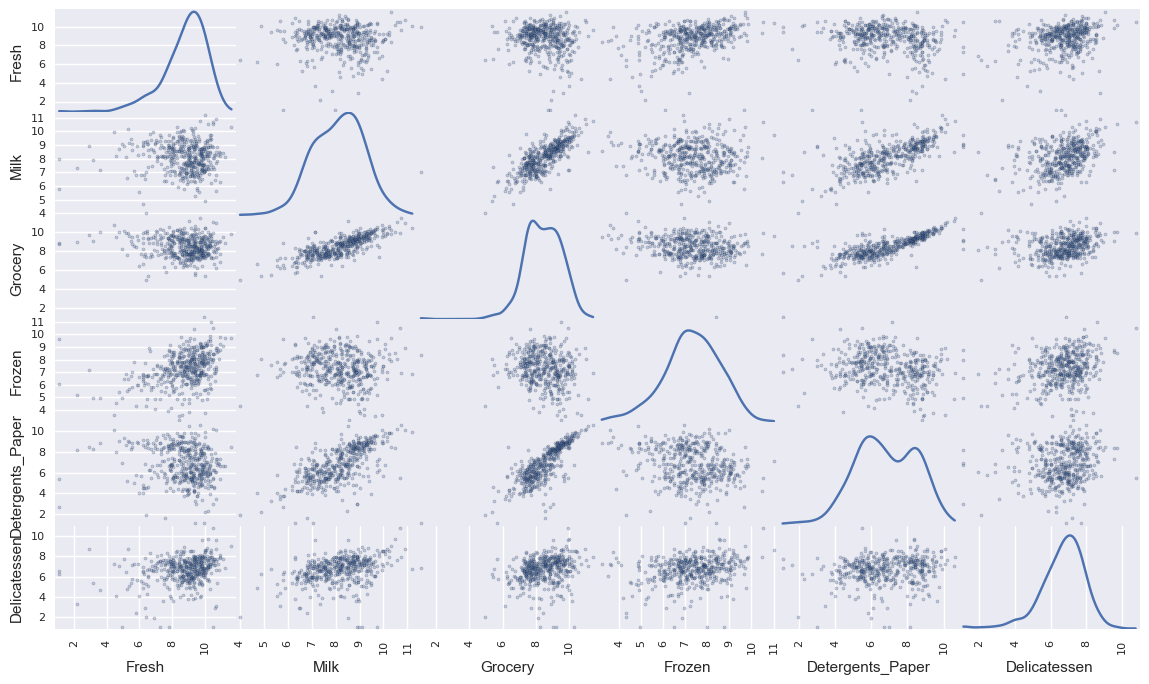

In [102]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [103]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
1,9.247540,9.796570,8.465479,8.452335,7.344073,8.091015
2,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [104]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    #print log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    

    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154]
#outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Based on the print out, the data point 65 is considered outlier for both the feature 'Fresh’ and ‘Frozen’. The data point 66 is considered outlier for both the feature 'Fresh’ and ‘Delicatessen’. The data point 75 is considered outlier for both the feature 'Grocery’ and ‘Detergents_Paper’. The data point 128 is considered outlier for both the feature 'Fresh’ and ‘Delicatessen’. The data point 154 is considered outlier for the features 'Grocery’, ‘Milk’ and 'Delicatessen'.

There are certain legitimate reasons to remove the data points as outlier, for example, mistaken entry of data points, the outlier data points introduce a strong association (Reference: http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/ based on feedback provided by the previous reviwer).

As the outliers identified based on the definition above for more than one feature could potentially skew the distribution of the data points and introduce association to affect the identification of genuine clusterss, at this stage I would go ahead and remove these 5 outlier data points in order to identify the inherent clusters truely present in the data set.

However, removing data points could have a huge impact on the data and clustering. For example, keeping or removing the outlier data points may change the number of clusters/segments for this data set. For additional work beyond the scope of this project, it would be worthwhile also trying to keep these outlier points and compare the resulting clusters to further investigate any changes in terms of clustering due to the removal of these data points. Also, additional visual examination of the outlier data points in relation to the clusters could be helpful to gain furhter insight into the data and warrant thorough understanding of the data and clustering.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
from  - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


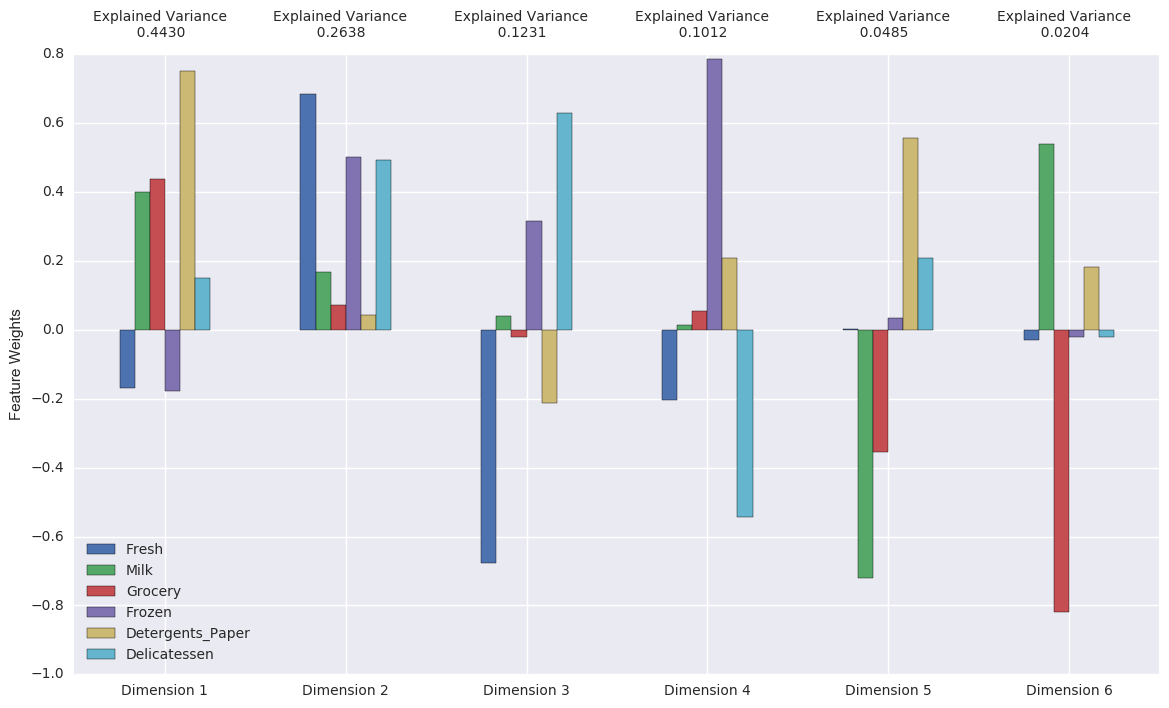

In [105]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# Cumulative explained variance
print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** Using the code above to print out the cumulative explained variance, we can tell that 70.68% of the variance in the data is explained in total by the first and second principal components. 

93.11% of the variance in the data is explained in total by the first four principal components.

The first dimensions gives relatively high (either positive or negative) weights to Milk, Grocery and Detergents_Paper. It would likely separate grocery stores from other types of customers. The second dimension gives relatively high weights to Fresh, Frozen and Delicatessen items, suggesting it could separate restaurants from other customers pretty well. The third dimension gives relatively high weights to Fresh and Delicatessen items, suggesting it likely could separate cafe types of customers that focus on selling fresh and deli items from the other customers. The fourth dimension gives relatively high weights to Frozen and Delicatessen, suggesting it could separate typical restaurants (which buy lots of frozen food and make them into dishes) pretty well from the other customers.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [106]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8834,1.5991,1.3204,-0.5432,0.3934,0.3117
1,1.0094,1.8870,0.8590,0.1660,-0.5667,0.9315
2,2.7963,-5.6935,0.9849,0.7427,0.7682,-1.1935


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [107]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [108]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8834,1.5991
1,1.0094,1.8870
2,2.7963,-5.6935


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

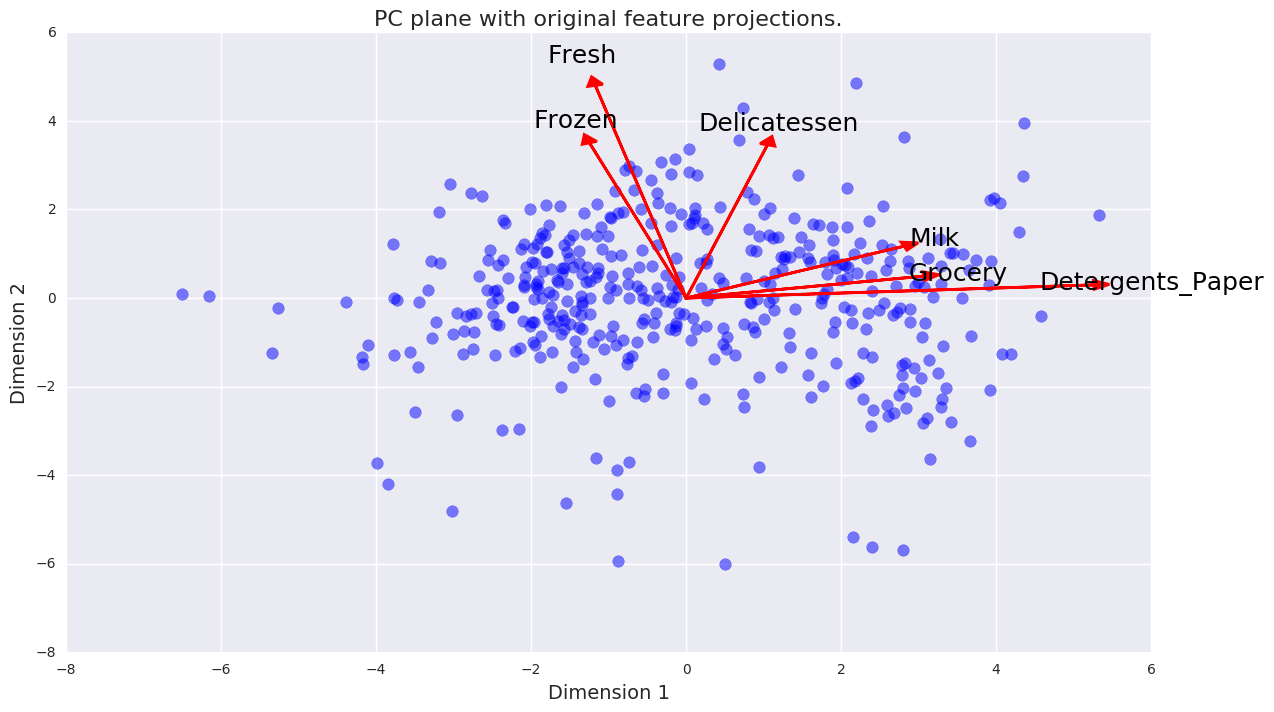

In [109]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** Advantages of the K-Means clustering algorithm include: (1) It is a fast and robust algorithm while straightforward (2) It is a relatively efficient algorithm (3) The algorithm works really well when data points are separate and in distinct groups. (Reference: https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm)

Advantages of the Gaussian Mixture Model clustering algorithm include: (1) It is flexible to choose the distribition of the features (2) It can provide an estimated densirty distribution for each cluster (3) It allows for "soft" assignment of the cluster. (Reference: https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html)

I would choose the Gaissian Mixture Model clustering algorithm for this customer segmentation problem. The wholesale customer data do not appear to fall into obviously observable distinct groups. Each feature in the data may fall into certain distribution. These suggest to me that the Gaussian Mixture Model clustering may work better for this data set.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [110]:
from sklearn import mixture
from sklearn import metrics

n_clusters = 2
print 'Number of clusters: ', n_clusters

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer =  mixture.GMM(n_components=n_clusters, random_state=0)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds)
print "Silhouette score: {:.4f}".format(score)

Number of clusters:  2
Silhouette score: 0.4118


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The following is the silhouette score for each of the cluster numbers I tried:

Silhouette score: 0.4118 (2 clusters), 
Silhouette score: 0.3736 (3 clusters), 
Silhouette score: 0.3082 (4 clusters)

Of these, 2 clusters has the best silhouette score and I chose n_clusters=2 for the remaining questions.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

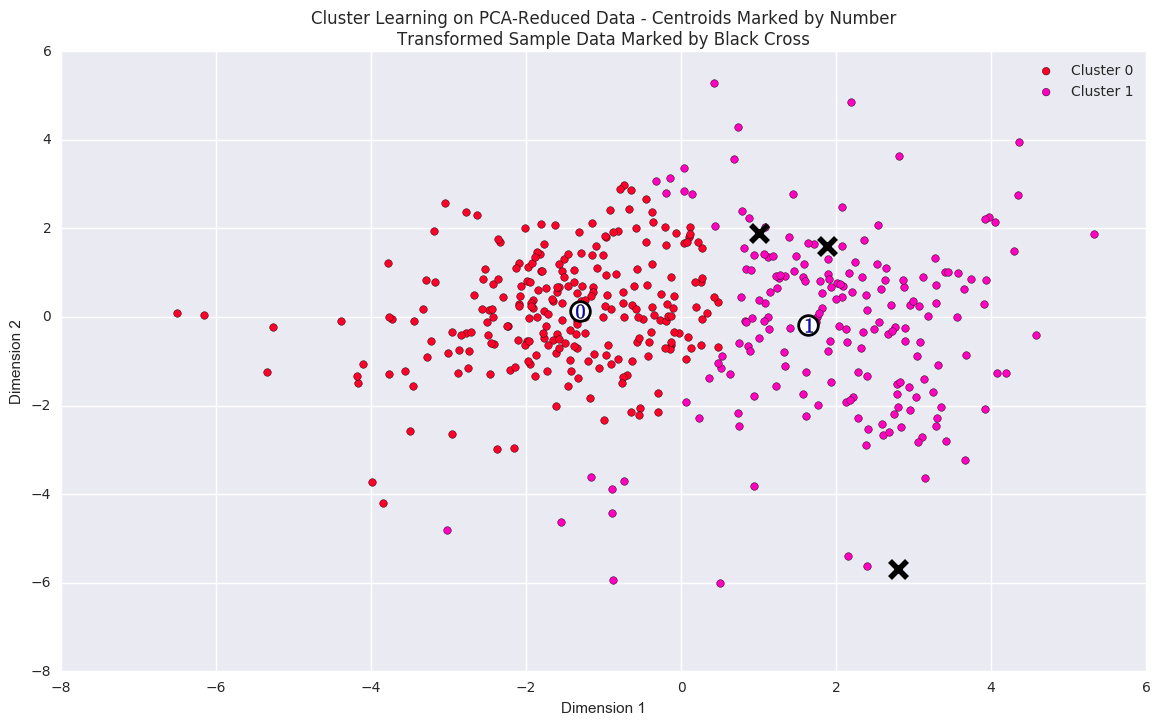

In [111]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [112]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** For the representative data point for Segment 0, its purchase cost for Fresh is a bit above the median but below the 75% percentile, its purchase cost for Milk is between the 25% percentile and median, its purchase cost for Grocery is between 25% percentile and the median, its purchase cost for Frozen is a bit above median but below the 75% percentile, its purchase cost of Detergents_Paper is between the 25% percentile and the median, and its purchase cost for Delicatessen is slight below the median. Given its below-median purchase cost for Milk, Grocery, Detergents_Paper and Delicatessen but above median purchase cost for Fresh and Frozen items, this segment could represent a set of establishments similar to restaurants.

For the representative data point for Segment 1, its purchase cost for Fresh is slighly above the 25% percentile, its purchase cost of Milk is above the median but below the 75% percentile, its purchase cost of Grocery is between the median and 75% percentile, its purchase cost of Frozen is a bit above the 25% percentile but below the median, its purchase cost of Detergents_Paper is between the median and 75% percentile, and its purchase cost of Delicatessen is between the 25% percentile and median. Given its large spending of Milk, Grocery and Detergents_Paper but relatively low on Fresh and Frozen items, it could represent a set of establishments like grocery stores.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [113]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:** Before running the above code for prediction, Sample point 0 seemed to be more closely resembling the cluster center for Segment 1, therefore I would predict it to be in cluster 1. Sample point 1 seemed to be more similar to the center of Segment 0 (even though it's not a clear cut), therefor I would predict it to be in cluster 0. Sample point 2 seemed to be more resembling Segment 1 for most of its features. So I would predict Sample point 2 to be in cluster 1.

After running the above code, the code predicts all Sample points to be in Cluster 1. The predictions appear to agree with my intuition for 2 of the 3 samples, suggesting that the predicted clusters based on the Gaissian Mixture Model clustering algorithm are in line with intuitions about the data distribution comparison with the segment center.

As a comparison with the descriptions I made for Question 1 to discuss these sample data points, my estimations for question 1 were trying to describe three categories of customers, one for each sample data point, even though the clustering analysis done by the code is based on two clusters, based on the analysis of the silhouette scores. Having said that, I would say what I described in Question 1 for sample data point 0 (a deli store that also sells some foods and groceries) is resembling to Segment 0, sample data point 1 (a retail store focusing on selling large volumes of everyday food) is more resembling to Segment 1, and sample data point 2 (an open market Grocery store) is also more resembling to Segment 1. These descriptions now appear to be a bit off given the clustering analysis and intuition comparing the data points with cluster centers.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** We can not assume the change affects all customers euqlly (assuming so would not be a wise choice). The new delivery service reduces the frequency of deliver from 5 days a week to 3 days a week. By reasoning, the reduced delivery frequency would affect the customer segments where fresh food/milk/grocery items (versus frozen items) are sold in larger volumes, as these items would be better delivered more frequently.  The above-mentioned Segment 1 seem to fall into this group and they would be affected the most by the reduced deliver frequency.

To conduct A/B testing, I would propose three A/B tests.

A/B test 1: Using the entire set of customers, randomly draw a set of control group and another set of experimental group (with the same/similar number of customers in each group). These two groups would have no overlap. For the control group, I would use the original delivery schedule (5 days a week). For the experimental group, I would use the revised deliver schedule (3 days a week). I would run the A/B test for a certain period of time (for example, one month) and then collect the total purchase costs among all products for each customer. At the end of the testing, I would conduct a t test to test if the mean purchase cost in the experimental group is statistically different than that in the control group.

A/B test 2: Using the set of customers from cluster 0 (based on the code/analysis done in prior excercises for this problem), randomly draw a set of control group and another set of experimental group (with the same/similar number of customers in each group). The rest of the A/B testing will be performed exactly as done in A/B test 1. The only difference is that the A/B testing is done among customers from cluster 0.

A/B test 3: Using the set of customers from cluster 1 (based on the code/analysis done in prior excercises for this problem), randomly draw a set of control group and another set of experimental group (with the same/similar number of customers in each group). The rest of the A/B testing will be performed exactly as done in A/B test 2. The only difference is that the A/B testing is done among customers from cluster 1.

After these A/B tests, we can tell if the change of delivery schedule would affect all the customers significantly, or if it would only affect certain segment of the customers. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The target variable would be the engineered feature: 'customer segment'. The supervised learner would be trained on the original customers, using the annual spending from all product categories to predict the customer segment. This learner, after being trained, would then be used to predict the customer segment of the new customers, using their estimated product sepending.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

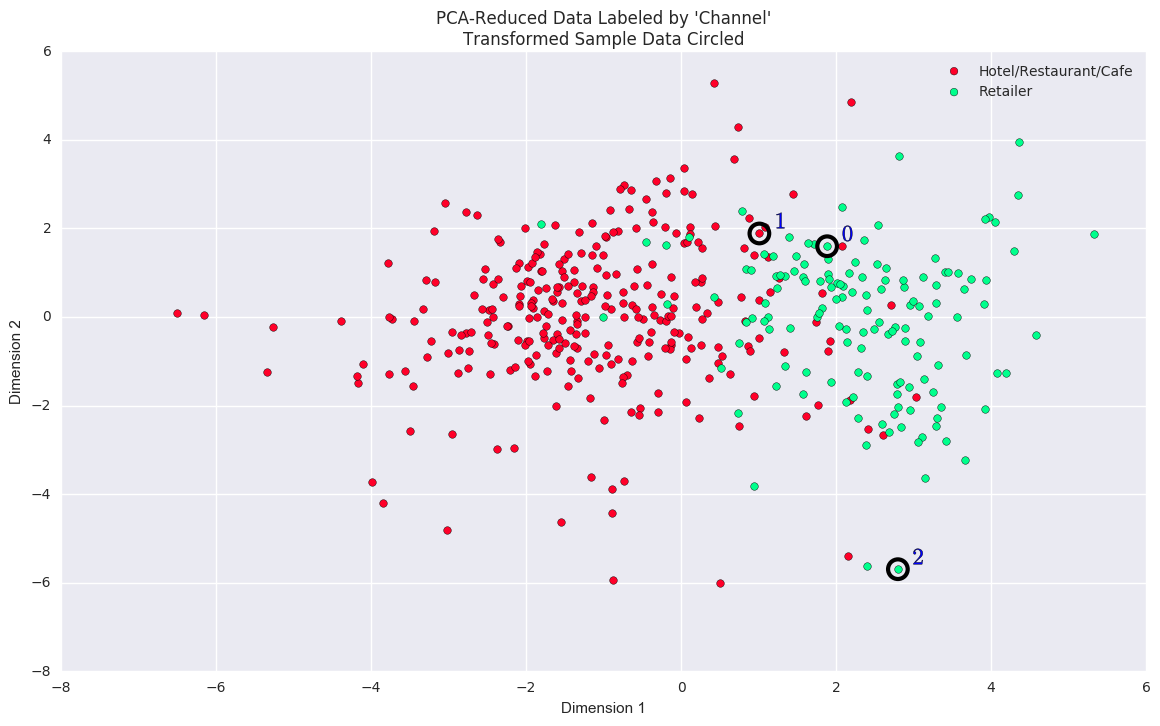

In [114]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm and 2 clusters compare similarly to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. There are certain customer segments that would be classified as purely 'Retailers' (the ones on the far right) or 'Hotels/Restaurants/Cafes' (the ones on the far left). But there are some customer segments (in the middle or around the border of these two clusters) that possess a combination of 'Retailers' and 'Hotels/Restaurants/Cafes' characteristics. These classifications are consistent to my previous definition of the customer segments: Segment 0 spends a lot on frozen and fresh food (Hotels/Restaurants/Cafes typically do so), while Segment 1 spends a lot on milk, everyday groceries and household items, represented by Retailers.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.